### Breast Cancer Analysis and Prediction

#### Introduction
Breast cancer is the most common invasive cancer in women and the second leading cause of cancer
death in women after lung cancer. Advances in screening and treatment for breast cancer have
improved survival rates dramatically since 1989. Early screening, leading to detection has, from
statistics, led to the increase in survival rates.

There is a possibility of detecting cancer at an early stage, based on features collected from the patients.

Features of the cell from various patients are computed from a digitized image of a fine needle aspirate
(FNA) of a breast mass. They describe characteristics of the cell nuclei present in the image.
n the 3-dimensional space is that described in: [K. P. Bennett and O. L. Mangasarian: "Robust Linear
Programming Discrimination of Two Linearly Inseparable Sets", Optimization Methods and Software 1,
1992, 23-34].

##### Aim:
Observe which features are more helpful in predicticting Malignant (Has the potential to be dangerous) and Benign (Not dandgerous to health) Cancer.

Analyse the data and build a model that would detect cancerous cells with good accuracy. 


In [38]:
#Import the relevant libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sklearn
import seaborn as sns
from sklearn.model_selection import train_test_split

#### Step 1: Data Exploration

In [39]:
#Import the cancer dataset
dataset = pd.read_csv('data.csv')
dataset.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [40]:
dataset.drop(columns = ['Unnamed: 32'], axis=1, inplace=True)

In [41]:
dataset.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [42]:
#Finding the dimensions of the dataset
print("Cancer data set dimensions : {}".format(dataset.shape))

Cancer data set dimensions : (569, 32)


From this, we can see that the data set contains 569 rows and 32 columns. 

The column we are going to predict is ‘Diagnosis’, it states if the cell is M = malignant or B = benign. 

In [43]:
#Finding any missing or null data points of the dataset
dataset.isnull().sum()
dataset.isna().sum()

id                         0
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

In [44]:
#Remove any column with empty input
dataset.dropna(inplace = True)

In [45]:
dataset.shape

(569, 32)

In [46]:
#Count the number of patients with malignant and benign cells
dataset['diagnosis'].value_counts()

B    357
M    212
Name: diagnosis, dtype: int64

This shows you that the number of patients with Benign cells are: 357 and the number of patients with malignant cells are: 212
        
The next thing we would do is to:
#### Visualize the count

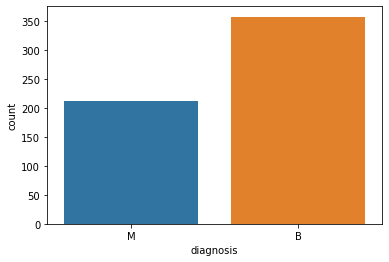

In [47]:
sns.countplot(dataset['diagnosis'], label = 'count')

#### Step 2: Encode The Categorical Data

In [48]:
#Encode categorical data values(Change the values in the 'diagnosis' column from 'M' and 'B' to '1' and '0' respectively)
# from sklearn.preprocessing import LabelEncoder
# labelencoder_Y = LabelEncoder()
# Y = labelencoder_Y.fit_transform(Y)

In [49]:
dataset['diagnosis'] = dataset['diagnosis'].apply(lambda x: '1' if x == 'M' else '0')
dataset = dataset.set_index('id')

In [50]:
dataset.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
id,,,,,,,,,,,,,,,,,,,,,
842302,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
842517,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
84300903,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
84348301,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
84358402,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


#### Step 3: Drop the 'Diagnosis' column

In [51]:
focus = dataset['diagnosis'].values
dataset.drop(columns = ['diagnosis'], inplace = True)

In [53]:
focus.shape

(569,)

In [54]:
dataset.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
id,,,,,,,,,,,,,,,,,,,,,
842302,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
842517,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
84300903,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
84348301,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
84358402,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


#### Step 4: Getting the Correlation of the Columns

In [89]:
#Get the correlation of the columns
dataset.corr()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
radius_mean,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,0.147741,-0.311631,...,0.969539,0.297008,0.965137,0.941082,0.119616,0.413463,0.526911,0.744214,0.163953,0.007066
texture_mean,0.323782,1.000000,0.329533,0.321086,-0.023389,0.236702,0.302418,0.293464,0.071401,-0.076437,...,0.352573,0.912045,0.358040,0.343546,0.077503,0.277830,0.301025,0.295316,0.105008,0.119205
perimeter_mean,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,0.183027,-0.261477,...,0.969476,0.303038,0.970387,0.941550,0.150549,0.455774,0.563879,0.771241,0.189115,0.051019
area_mean,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,0.151293,-0.283110,...,0.962746,0.287489,0.959120,0.959213,0.123523,0.390410,0.512606,0.722017,0.143570,0.003738
smoothness_mean,0.170581,-0.023389,0.207278,0.177028,1.000000,0.659123,0.521984,0.553695,0.557775,0.584792,...,0.213120,0.036072,0.238853,0.206718,0.805324,0.472468,0.434926,0.503053,0.394309,0.499316
compactness_mean,0.506124,0.236702,0.556936,0.498502,0.659123,1.000000,0.883121,0.831135,0.602641,0.565369,...,0.535315,0.248133,0.590210,0.509604,0.565541,0.865809,0.816275,0.815573,0.510223,0.687382
concavity_mean,0.676764,0.302418,0.716136,0.685983,0.521984,0.883121,1.000000,0.921391,0.500667,0.336783,...,0.688236,0.299879,0.729565,0.675987,0.448822,0.754968,0.884103,0.861323,0.409464,0.514930
concave points_mean,0.822529,0.293464,0.850977,0.823269,0.553695,0.831135,0.921391,1.000000,0.462497,0.166917,...,0.830318,0.292752,0.855923,0.809630,0.452753,0.667454,0.752399,0.910155,0.375744,0.368661
symmetry_mean,0.147741,0.071401,0.183027,0.151293,0.557775,0.602641,0.500667,0.462497,1.000000,0.479921,...,0.185728,0.090651,0.219169,0.177193,0.426675,0.473200,0.433721,0.430297,0.699826,0.438413
fractal_dimension_mean,-0.311631,-0.076437,-0.261477,-0.283110,0.584792,0.565369,0.336783,0.166917,0.479921,1.000000,...,-0.253691,-0.051269,-0.205151,-0.231854,0.504942,0.458798,0.346234,0.175325,0.334019,0.767297


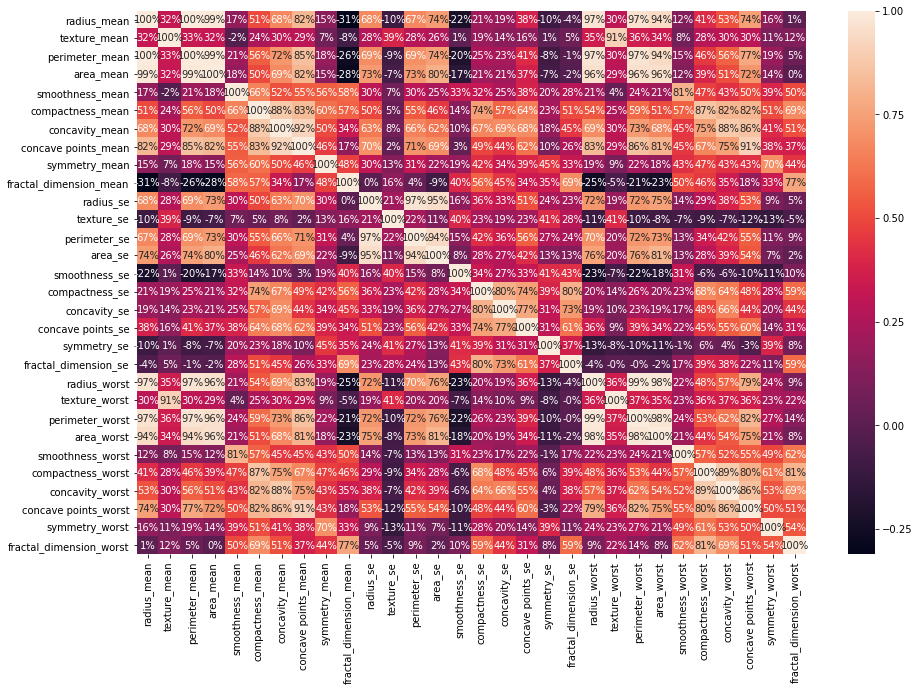

In [94]:
#Visualize the correlation

plt.figure(figsize=(15,10))
sns.heatmap(dataset.corr(), annot=True, fmt='.0%')

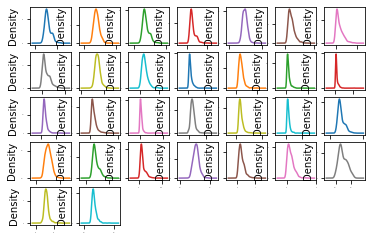

In [56]:
# Visualising the data using density plots to get a sense of the data distribution.
dataset.plot(kind='density', subplots=True, layout=(5,7), sharex=False, legend=False, fontsize=1)
plt.show()

Split the data into 80% training and 20% testing data sets.

In [57]:
X_train, X_test, y_train, y_test = train_test_split (dataset, focus, test_size = 0.20, random_state=21)

Scale the data to bring all features to the same level of magnitude, which means the feature / independent data will be within a specific range for example 0–100 or 0–1.

In [58]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

#### Step 4 
Fitting our Model into a classifier

In [ ]:
#logistic_regression = LogisticRegression()

In [70]:
def models (X_train, y_train):
    #Use Logistic Regression 
    from sklearn.linear_model import LogisticRegression
    log = LogisticRegression(random_state = 21)
    log.fit(X_train, y_train)
    
    #print model accuracy on the training data.
    print('[0]Logistic Regression Training Accuracy:', log.score(X_train, y_train))
    
    return log

In [71]:
# Create the model and look at the accuracy score on the training data to classify if the patient has cancer or not
model = models(X_train,y_train)

[0]Logistic Regression Training Accuracy: 0.989010989010989


C:\Users\chidi\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [74]:
def models (X_train, y_train):
    #Using KNeighborsClassifier 
    from sklearn.neighbors import KNeighborsClassifier
    knn = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
    knn.fit(X_train, y_train)
    
    #print model accuracy on the training data.
    print('[1]K Nearest Neighbor Training Accuracy:', knn.score(X_train, y_train))
    
    return knn

In [75]:
# Create the model and look at the accuracy score on the training data to classify if the patient has cancer or not
model = models(X_train,y_train)

[1]K Nearest Neighbor Training Accuracy: 0.9736263736263736


In [76]:
def models (X_train, y_train):
    #Using SVC linear
    from sklearn.svm import SVC
    svc_lin = SVC(kernel = 'linear', random_state = 21)
    svc_lin.fit(X_train, y_train)
    
    #print model accuracy on the training data 
    print('[2]Support Vector Machine (Linear Classifier) Training Accuracy:', svc_lin.score(X_train, y_train))
    
    return svc_lin

In [77]:
# Create the model and look at the accuracy score on the training data to classify if the patient has cancer or not
model = models(X_train,y_train)

[2]Support Vector Machine (Linear Classifier) Training Accuracy: 0.9868131868131869


In [78]:
def models (X_train, y_train):
    #Using SVC rbf
    from sklearn.svm import SVC
    svc_rbf = SVC(kernel = 'rbf', random_state = 21)
    svc_rbf.fit(X_train, y_train)
    
    #print model accuracy on the training data 
    print('[3]Support Vector Machine (RBF Classifier) Training Accuracy:', svc_rbf.score(X_train, y_train))
    
    return svc_rbf

In [79]:
# Create the model and look at the accuracy score on the training data to classify if the patient has cancer or not
model = models(X_train,y_train)

[3]Support Vector Machine (RBF Classifier) Training Accuracy: 0.9824175824175824


In [80]:
def models (X_train, y_train):
    #Using GaussianNB 
    from sklearn.naive_bayes import GaussianNB
    gauss = GaussianNB()
    gauss.fit(X_train, y_train)
    
    #print model accuracy on the training data 
    print('[4]Gaussian Naive Bayes Training Accuracy:', gauss.score(X_train, y_train))
    
    return gauss

In [81]:
# Create the model and look at the accuracy score on the training data to classify if the patient has cancer or not
model = models(X_train,y_train)

[4]Gaussian Naive Bayes Training Accuracy: 0.9362637362637363


In [83]:
def models (X_train, y_train):
    #Using DecisionTreeClassifier 
    from sklearn.tree import DecisionTreeClassifier
    tree = DecisionTreeClassifier(criterion = 'entropy', random_state = 21)
    tree.fit(X_train, y_train)
    
    #print model accuracy on the training data 
    print('[5]Decision Tree Classifier Training Accuracy:', tree.score(X_train, y_train))
    
    return tree

In [84]:
# Create the model and look at the accuracy score on the training data to classify if the patient has cancer or not
model = models(X_train,y_train)

[5]Decision Tree Classifier Training Accuracy: 1.0


In [85]:
def models (X_train, y_train):
    #Using RandomForestClassifier method of ensemble class to use Random Forest Classification algorithm
    from sklearn.ensemble import RandomForestClassifier
    forest = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 21)
    forest.fit(X_train, y_train)
    
    #print model accuracy on the training data 
    print('[6]Random Forest Classifier Training Accuracy:', forest.score(X_train, y_train))
    
    return forest

In [86]:
# Create the model and look at the accuracy score on the training data to classify if the patient has cancer or not
model = models(X_train,y_train)

[6]Random Forest Classifier Training Accuracy: 0.9934065934065934


In [99]:
#def models (X_train, y_train):
    #Using XGBoost method of ensemble class to use XGBoost Classification algorithm
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score

#instatiate model and train
model = XGBClassifier(learning_rate = 0.05, n_estimators = 300, max_depth = 5)
model.fit(X_train, y_train)

# make predictions for test set
y_pred = model.predict(X_test)
prections = [round(value) for value in y_pred]

accuracy = accuracy_score(y_test, predictions)
#print model accuracy on the training data 
print('[8]XGBoost Classifier Training Accuracy:'% (accuracy * 100.0))
    


ModuleNotFoundError: No module named 'xgboost'

In [97]:
# Create the model and look at the accuracy score on the training data to classify if the patient has cancer or not
model = models(X_train,y_train)

ModuleNotFoundError: No module named 'xgboost'